### Titanic Machine Learning
The objective is to predict which passengers survive, and which don't.
We know that passenger could get on in Southampton (England), Cherbourg (France), and in Queenstown (Ireland).
We expect that socioeconomic strata plays a role in who survives. This is probably indicated by the class of cabin the passengers were in.

### Exploratory Data Analysis

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
# Load titanic data
train_data= pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
pd.set_option('display.max_rows', 1000)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


So, the `Cabin` attribute has a lot of null values. What other attributes have lots of null values? Run `test_data.info()`

In [84]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We see that the `Age` attribute is also missing many values.

In [85]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Looking at the correlation matrix, `Survived` seems to be correlated strongly with `Pclass` (the lower the class, i.e. higher number, the less chances of survival), and `Fare` (the more you paid, the more likely you are to survive.)

Let's look at the distribution of `Age`, `SibSp`, `Parch` and `Fare`

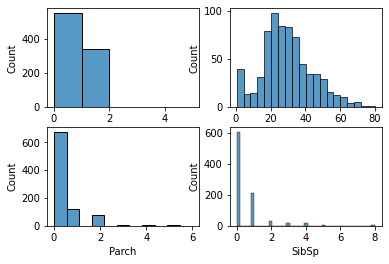

In [86]:
plt.subplot(221)
sns.histplot(train_data, x="Survived", bins=[0,1,2,3,4,5])

plt.subplot(222)
sns.histplot(train_data, x="Age")

plt.subplot(223)
sns.histplot(train_data, x="Parch")

plt.subplot(224)
sns.histplot(train_data, x="SibSp")

plt.show()

So, this suggests that more died than they did survive. There were a lot of people between 20 and 30, and a few infants. Most people had no children or parents with them, but about 100 had either one or two children. Similary for siblings or spouses, most people had none, but about 200 had one. I would guess that this is mainly spouses.

## Feature Engineering

The `Age` attribute has a lot of null values. Let's start by finding the median age of passengers by `Sex` and `Pclass`. These lines are taken from [here](https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial)

In [166]:
age_by_pclass_sex = train_data.groupby(['Sex', 'Pclass']).median()['Age']
age_by_pclass_sex = age_by_pclass_sex.reset_index()
age_by_pclass_sex

array([35. , 28. , 21.5, 36. , 30. , 25. ])

In [157]:
train_data[["Sex", "Pclass", "Age"]]

,Sex,Pclass,Age
0,male,3,22.00
1,female,1,38.00
2,female,3,26.00
3,female,1,35.00
4,male,3,35.00
5,male,3,NaN
6,male,1,54.00
7,male,3,2.00
8,female,3,27.00
9,female,2,14.00


In [158]:
def impute_age(df, age_by_pclass_sex):
    df_to_return = df.copy()
    for sex in ['male', 'female']:
        for c in range(1,4):
            df_to_return.loc[ (df_to_return.Age.isnull()) & 
                   (df_to_return.Sex == sex) & 
                   (df_to_return.Pclass == c), "Age" ] = age_by_pclass_sex.loc[ (age_by_pclass_sex.Sex == sex) &
                                                                        (age_by_pclass_sex.Pclass == c), "Age"]
    
    # df_to_return["Age"] = train_data.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
    return df_to_return
train_data = impute_age(train_data, age_by_pclass_sex)
train_data[["Sex", "Pclass", "Age"]]

,Sex,Pclass,Age
0,male,3,22.00
1,female,1,38.00
2,female,3,26.00
3,female,1,35.00
4,male,3,35.00
5,male,3,25.00
6,male,1,54.00
7,male,3,2.00
8,female,3,27.00
9,female,2,14.00


In [164]:
 train_data.loc[ (train_data.Age.isnull()) & 
                   (train_data.Sex == 'male') & 
                   (train_data.Pclass == 1), "Age" ] = 7
 train_data.loc[  
                   (train_data.Sex == 'male') & 
                   (train_data.Pclass == 1), "Age" ]

6      54.00
23     28.00
27     19.00
30     40.00
34     28.00
35     42.00
54     65.00
55      7.00
62     45.00
64      7.00
83     28.00
92     46.00
96     71.00
97     23.00
102    21.00
110    47.00
118    24.00
124    54.00
137    37.00
139    24.00
155    51.00
168     7.00
170    61.00
174    56.00
185     7.00
187    45.00
209    40.00
224    38.00
245    44.00
248    37.00
252    62.00
262    52.00
263    40.00
270     7.00
273    37.00
284     7.00
295     7.00
298     7.00
305     0.92
331    45.50
332    38.00
336    29.00
339    45.00
351     7.00
370    25.00
373    22.00
377    27.00
390    36.00
430    28.00
434    50.00
438    64.00
445     4.00
447    34.00
449    52.00
452    30.00
453    49.00
456    65.00
460    48.00
462    47.00
467    56.00
475     7.00
484    25.00
487    58.00
492    55.00
493    71.00
505    18.00
507     7.00
512    36.00
515    47.00
527     7.00
536    45.00
544    50.00
545    64.00
550    17.00
555    62.00
557     7.00
572    36.00

In [118]:
for i in range(1,4):
    print(i)

1
2
3


This suggests that in higher class (i.e. lower `Pclass` number), people are older. Women tend to be younger than men. Now, impute the missing data.

Let's get the titles of people from their name. The names are all in order of `last_name, title. first_name last_name`. So, let's split on the `,` and the `.`

In [ ]:
names = t

In [ ]:
# Impute the Age attribute
from sklearn.impute import SimpleImputer

def impute_age(df):
    imputer = SimpleImputer(strategy="median")
    age_data = df[['Age']]
    imputer.fit(age_data)
    age_data_transformed = imputer.transform(age_data)
    age_data_transformed = pd.DataFrame(age_data_transformed, columns=age_data.columns)
    df[["Age"]] = age_data_transformed
    return df

train_data = impute_age(train_data)
test_data = impute_age(test_data)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Age"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('random_forest_submission.csv', index=False)
print("Your submission was successfully saved!")

This submission scored 77.2%; excluding `Age` scores 77.5%

In [ ]:
from sklearn.linear_model import SGDClassifier

y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch", "Age"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X, y)
predictions = sgd_clf.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('sgd_classifier_submission.csv', index=False)
print("Your submission was successfully saved!")

This scores only 42.1%.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch", "Age"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

knn_clf = KNeighborsClassifier()
knn_clf.fit(X, y)
predictions = knn_clf.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('knn_classifier_submission.csv', index=False)
print("Your submission was successfully saved!")

Scores 66.3%.

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn_clf.fit(X, y)
predictions = knn_clf.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('knn_classifier_six_neighbours_submission.csv', index=False)
print("Your submission was successfully saved!")

Same score.

In [ ]:
# Try including Embarkment

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('random_forest_submission.csv', index=False)
print("Your submission was successfully saved!")

Still, only 77%; Not as good as the first random forest